# Importing dataset

This dataset was acquired from: https://www.kaggle.com/mirichoi0218/insurance/tasks?taskId=740

## Description

Columns:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- children: Number of children covered by health insurance / Number of dependents
- smoker: Smoking
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: Individual medical costs billed by health insurance

**The goal is to accurately predict insurance costs**

# Import and Split Data into Train and Test

In [1]:
import pandas as pd
import numpy as np

In [4]:
dataset = pd.read_csv('dataset/insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
# checking if there's any null value
dataset.isnull().values.any()

False

In [9]:
# checking if there's any nan value
dataset.isna().values.any()

# can also use 
dataset.isnull().sum()

False

In [11]:
dataset.shape

(1338, 7)

In [13]:
# splitting data into train and test, 70 train and 30 test
data_train = dataset.sample(frac=0.7, random_state=46)
data_train.head()

,age,sex,bmi,children,smoker,region,charges
141,26,male,32.49,1,no,northeast,3490.5491
1065,42,female,25.30,1,no,southwest,7045.4990
467,56,female,33.82,2,no,northwest,12643.3778
557,34,male,34.21,0,no,southeast,3935.1799
166,20,female,37.00,5,no,southwest,4830.6300


In [14]:
data_train.shape

(937, 7)

In [17]:
data_test = dataset.drop(data_train.index)
data_test.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,no,southeast,1725.5523
5,31,female,25.74,0,no,southeast,3756.6216
14,27,male,42.13,0,yes,southeast,39611.7577
16,52,female,30.78,1,no,northeast,10797.3362
21,30,female,32.40,1,no,southwest,4149.7360


In [18]:
data_test.shape

(401, 7)

In [20]:
# reseting index, to start from 0 to N - 1
data_train.reset_index(drop=True, inplace=True)
data_test.reset_index(drop=True, inplace=True)

# Setup the pycaret to use regression

In [10]:
from pycaret.regression import *

In [22]:
# passin data train, specifiying the normalization which removes the outliers using z-score
# the k-fold is 10
set = setup(data=data_train, normalize=True, target='charges')

,Description,Value
0,session_id,8739
1,Target,charges
2,Original Data,"(937, 7)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,4
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(655, 14)"


In [24]:
# compare best models
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2769,2.416e+07,4861,0.8221,0.4647,0.3356,0.054
lightgbm,Light Gradient Boosting Machine,2974,2.434e+07,4883,0.8199,0.5294,0.3632,0.617
rf,Random Forest Regressor,2814,2.546e+07,5000,0.8097,0.4669,0.3438,0.331
et,Extra Trees Regressor,2911,2.982e+07,5428,0.7784,0.4894,0.3351,0.307
ada,AdaBoost Regressor,4707,3.262e+07,5678,0.7626,0.6905,0.8548,0.033
lar,Least Angle Regression,4149,3.787e+07,6114,0.7245,0.5925,0.4282,0.044
llar,Lasso Least Angle Regression,4146,3.808e+07,6128,0.7236,0.5906,0.4286,0.018
ridge,Ridge Regression,4175,3.811e+07,6131,0.7235,0.5849,0.4333,0.046
br,Bayesian Ridge,4169,3.812e+07,6131,0.7235,0.5891,0.4322,0.046
lr,Linear Regression,4154,3.812e+07,6132,0.7233,0.5945,0.4291,3.027


# Creating model

In [44]:
# creating a Light Gradient Boosting Machine which according to the metrics, was the second best, but
# since i want to use the shap interpretation graph, i'm going to use this decision tree based model
lgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3215,3.156e+07,5618,0.8455,0.4582,0.287
1,3458,3.293e+07,5738,0.6046,0.5882,0.3892
2,2473,1.619e+07,4023,0.8843,0.3617,0.2903
3,3341,2.344e+07,4841,0.8158,0.5773,0.5542
4,2538,1.721e+07,4148,0.8842,0.458,0.2816
5,3554,3.773e+07,6142,0.7693,0.9341,0.3779
6,2984,2.555e+07,5055,0.8463,0.4847,0.2933
7,2981,2.167e+07,4655,0.8097,0.5416,0.4912
8,2768,2.085e+07,4566,0.8346,0.4321,0.3174
9,2427,1.632e+07,4040,0.9049,0.4577,0.3498


###  Why it's important to tuning the model ? 

By tuning a Model we can generate a most accurate outcome.

In [47]:
# tune model to improve its hyperparameter
# Increasing the n_iter parameter may increase the training time but often results in a highly optimized model.
# this optmization uses by default a randomized grid search of a pre-defined search space
# the k-fold is by default 10
# k=10: The value for k is fixed to 10, a value that has been found through experimentation 
# to generally result in a model skill estimate with low bias a modest variance.
tuned_lgbm = tune_model(lgbm, n_iter = 50) 

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3822,3.64e+07,6033,0.8218,0.4935,0.4304
1,3398,3.127e+07,5592,0.6245,0.5634,0.4748
2,2825,1.606e+07,4008,0.8852,0.4462,0.4091
3,2854,1.801e+07,4244,0.8585,0.5455,0.547
4,2745,1.642e+07,4052,0.8895,0.4522,0.3711
5,3809,3.96e+07,6293,0.7579,0.5258,0.431
6,2903,2.422e+07,4921,0.8543,0.4637,0.3352
7,2831,1.879e+07,4335,0.835,0.5516,0.5803
8,2991,2.199e+07,4689,0.8255,0.4667,0.4127
9,2700,1.597e+07,3996,0.907,0.5028,0.4495


# Interprate Model

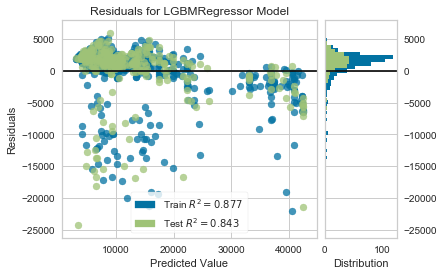

In [48]:
plot_model(tuned_lgbm)

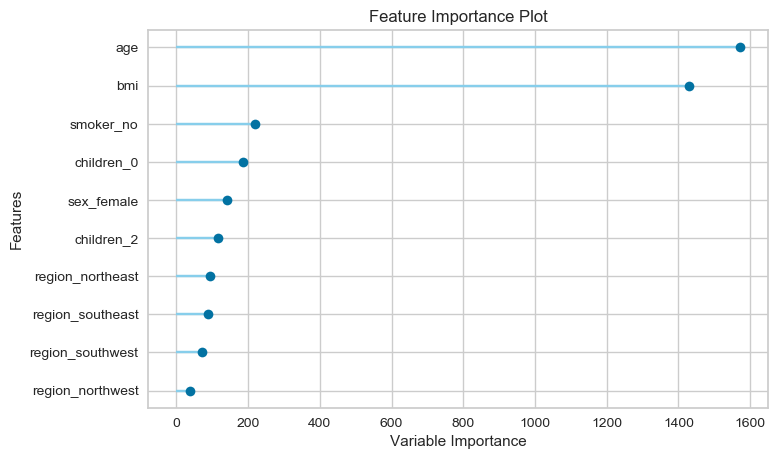

In [49]:
plot_model(tuned_lgbm, plot = 'feature')

**By interpret a model, we can analyze what is really important for the model**

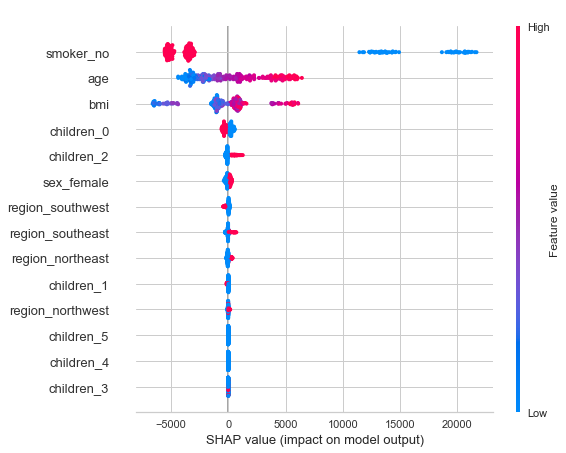

In [51]:
# this function only supports tree based models for binary classification:
# Extra Trees Regressor, Decision Tree, Light Gradient Boosting and Random Forest
# The features are ordered according to their importance
interpret_model(tuned_lgbm, 'summary')

# Predict Model

In [52]:
predict_model(tuned_lgbm)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2971,2.217e+07,4709,0.8434,0.4772,0.3907


,age,bmi,sex_female,children_0,children_1,children_2,children_3,children_4,children_5,smoker_no,region_northeast,region_northwest,region_southeast,region_southwest,charges,Label
0,-0.885939,-0.100568,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,3392.976807,5117.971504
1,-1.450561,0.642830,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1137.469727,3089.132298
2,1.584282,-0.100568,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,30942.191406,26112.970776
3,0.172727,0.401349,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,6571.024414,8110.252568
4,0.031571,-0.099744,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22462.042969,21634.574089
5,-0.250740,0.878541,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,5836.520508,8414.464503
6,1.584282,0.951068,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47403.878906,42137.718897
7,1.090238,-1.241215,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,12094.477539,13516.000719
8,-1.450561,1.041726,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,36149.484375,36827.202267
9,-1.027095,-1.039294,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2842.760742,7483.165810


# Finalize Model


Finalize model is the last step in a typical supervised experiment workflow. When an experiment is started in PyCaret using setup, a hold-out set is created that is not being used in model training. By default, if no train_size parameter is defined in setup, hold-out set contains 30% sample of the dataset. All the functions in PyCaret use the remaining 70% as training set to create, tune or ensemble models. As such, the hold-out set is the final assurance and used for diagnosis of overfitting / underfitting. However, once the predictions are generated on hold-out set using predict_model and you have chosen to deploy the specific model, you want to train your model for one final time on the entire dataset including hold-out.

This function finalizes the process by training the model with the entire dataset

DOC: https://pycaret.org/finalize-model/

In [60]:
final_model = finalize_model(tuned_lgbm)

# Save Model

In [62]:
save_model(final_model, 'lgbm_health')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[], target='charges',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strategy...
                                colsample_bytree=1.0, feature_fraction=1.0,
                                importance_type='split', learning_rate=0.01,
                                max_depth=-1, min_child_samples=16,
                                min_child_weight=0.001, min_split_gain=0.2,
                

# Load Model

In [63]:
model = load_model('lgbm_health')

Transformation Pipeline and Model Successfully Loaded


In [72]:
# Predicting in unseen data
results_dt = predict_model(tuned_lgbm, data=data_test)
results = pull()
results_dt.head()

,age,sex,bmi,children,smoker,region,charges,Label
0,18,male,33.77,1,no,southeast,1725.5523,3712.556571
1,31,female,25.74,0,no,southeast,3756.6216,5485.698357
2,27,male,42.13,0,yes,southeast,39611.7577,36827.202267
3,52,female,30.78,1,no,northeast,10797.3362,12411.571665
4,30,female,32.40,1,no,southwest,4149.7360,6884.182402


In [73]:
results

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,2633.5534,1.683486e+07,4103.0305,0.8811,0.4139,0.3533
